In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv("combined_data.csv")

df.head()

,timestamp,activity_id,heart_rate,hand_temp,acc_hand_16g_x,acc_hand_16g_y,acc_hand_16g_z,acc_hand_6g_x,acc_hand_6g_y,acc_hand_6g_z,...,gyro_ankle_y,gyro_ankle_z,mag_ankle_x,mag_ankle_y,mag_ankle_z,orient_ankle_w,orient_ankle_x,orient_ankle_y,orient_ankle_z,subject_id
0,5.89,0,NaN,33.3125,-9.79760,-1.45670,1.014380,-9.70702,-1.60337,1.32098,...,0.010364,0.010731,-35.4550,38.3829,-17.9083,0.546211,0.370903,0.695334,0.283892,108
1,5.90,0,NaN,33.3125,-9.91204,-1.41822,0.974050,-9.78262,-1.60285,1.29085,...,-0.005926,-0.006704,-35.4508,38.2543,-17.7663,0.545806,0.370867,0.695680,0.283872,108
2,5.91,0,NaN,33.3125,-9.87531,-1.57027,0.975113,-9.78237,-1.57265,1.29079,...,-0.002265,0.014646,-35.6984,38.2688,-17.0580,0.545484,0.371607,0.695437,0.284117,108
3,5.92,0,NaN,33.3125,-9.72175,-1.60870,1.054520,-9.70677,-1.60334,1.35118,...,0.035314,0.010982,-34.9492,38.7447,-17.6233,0.545474,0.372077,0.694859,0.284935,108
4,5.93,0,NaN,33.3125,-9.79920,-1.49497,0.975999,-9.58657,-1.57408,1.27549,...,-0.001065,-0.000410,-35.2105,38.8857,-17.9080,0.545810,0.372349,0.694122,0.285732,108


In [20]:
print(df['subject_id'].unique())

print(df['activity_id'].unique())

[108 109 107 106 104 105 101 102 103]
[ 0  1  2  3 17 16 12 13  4  6  7  5 24]


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 55 columns):
 #   Column           Dtype  
---  ------           -----  
 0   timestamp        float64
 1   activity_id      int64  
 2   heart_rate       float64
 3   hand_temp        float64
 4   acc_hand_16g_x   float64
 5   acc_hand_16g_y   float64
 6   acc_hand_16g_z   float64
 7   acc_hand_6g_x    float64
 8   acc_hand_6g_y    float64
 9   acc_hand_6g_z    float64
 10  gyro_hand_x      float64
 11  gyro_hand_y      float64
 12  gyro_hand_z      float64
 13  mag_hand_x       float64
 14  mag_hand_y       float64
 15  mag_hand_z       float64
 16  orient_hand_w    float64
 17  orient_hand_x    float64
 18  orient_hand_y    float64
 19  orient_hand_z    float64
 20  chest_temp       float64
 21  acc_chest_16g_x  float64
 22  acc_chest_16g_y  float64
 23  acc_chest_16g_z  float64
 24  acc_chest_6g_x   float64
 25  acc_chest_6g_y   float64
 26  acc_chest_6g_z   float64
 27  gyro_chest_x

In [24]:
df.describe()

,timestamp,activity_id,heart_rate,hand_temp,acc_hand_16g_x,acc_hand_16g_y,acc_hand_16g_z,acc_hand_6g_x,acc_hand_6g_y,acc_hand_6g_z,...,gyro_ankle_y,gyro_ankle_z,mag_ankle_x,mag_ankle_y,mag_ankle_z,orient_ankle_w,orient_ankle_x,orient_ankle_y,orient_ankle_z,subject_id
count,2.872533e+06,2.872533e+06,262268.000000,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,...,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.872533e+06
mean,1.834354e+03,5.466243e+00,109.872508,3.265258e+01,-4.960786e+00,3.587758e+00,3.168417e+00,-4.889420e+00,3.584267e+00,3.349479e+00,...,-3.450122e-02,7.752030e-03,-3.272102e+01,1.593304e+00,1.689044e+01,3.986417e-01,2.154835e-02,3.091533e-01,-1.878725e-02,1.045005e+02
std,1.105689e+03,6.331333e+00,25.870036,1.844274e+00,5.985029e+00,6.277838e+00,3.843923e+00,5.992726e+00,6.055750e+00,3.840650e+00,...,5.966026e-01,1.842552e+00,1.887860e+01,2.161181e+01,2.030858e+01,3.034561e-01,5.691302e-01,3.237875e-01,4.731373e-01,2.367003e+00
min,5.640000e+00,0.000000e+00,57.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,8.931600e+02,0.000000e+00,90.000000,3.143750e+01,-9.028420e+00,1.290268e+00,9.685818e-01,-8.933270e+00,1.284680e+00,1.164040e+00,...,-8.267093e-02,-3.084595e-01,-4.289480e+01,-1.148540e+01,3.289348e+00,1.563440e-01,-5.839910e-01,1.087023e-02,-5.047580e-01,1.020000e+02
50%,1.790830e+03,3.000000e+00,108.000000,3.312500e+01,-5.788145e+00,3.570830e+00,2.958415e+00,-5.737615e+00,3.613430e+00,3.132855e+00,...,-4.249850e-03,-2.216015e-03,-3.390020e+01,1.362615e+00,1.809105e+01,3.197555e-01,0.000000e+00,3.043820e-01,0.000000e+00,1.050000e+02
75%,2.710570e+03,7.000000e+00,125.000000,3.400000e+01,-7.829420e-01,6.602720e+00,6.002930e+00,-7.249920e-01,6.601960e+00,6.257612e+00,...,8.296868e-02,6.343258e-02,-1.905920e+01,1.733090e+01,3.087820e+01,5.794420e-01,6.279450e-01,6.020032e-01,4.634432e-01,1.070000e+02
max,4.475630e+03,2.400000e+01,202.000000,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.194460e+01,...,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,1.000000e+00,9.595380e-01,9.923540e-01,9.961050e-01,1.090000e+02


In [26]:
print(df.isna().sum())

timestamp                0
activity_id              0
heart_rate         2610265
hand_temp            13141
acc_hand_16g_x       13141
acc_hand_16g_y       13141
acc_hand_16g_z       13141
acc_hand_6g_x        13141
acc_hand_6g_y        13141
acc_hand_6g_z        13141
gyro_hand_x          13141
gyro_hand_y          13141
gyro_hand_z          13141
mag_hand_x           13141
mag_hand_y           13141
mag_hand_z           13141
orient_hand_w        13141
orient_hand_x        13141
orient_hand_y        13141
orient_hand_z        13141
chest_temp            3563
acc_chest_16g_x       3563
acc_chest_16g_y       3563
acc_chest_16g_z       3563
acc_chest_6g_x        3563
acc_chest_6g_y        3563
acc_chest_6g_z        3563
gyro_chest_x          3563
gyro_chest_y          3563
gyro_chest_z          3563
mag_chest_x           3563
mag_chest_y           3563
mag_chest_z           3563
orient_chest_w        3563
orient_chest_x        3563
orient_chest_y        3563
orient_chest_z        3563
a

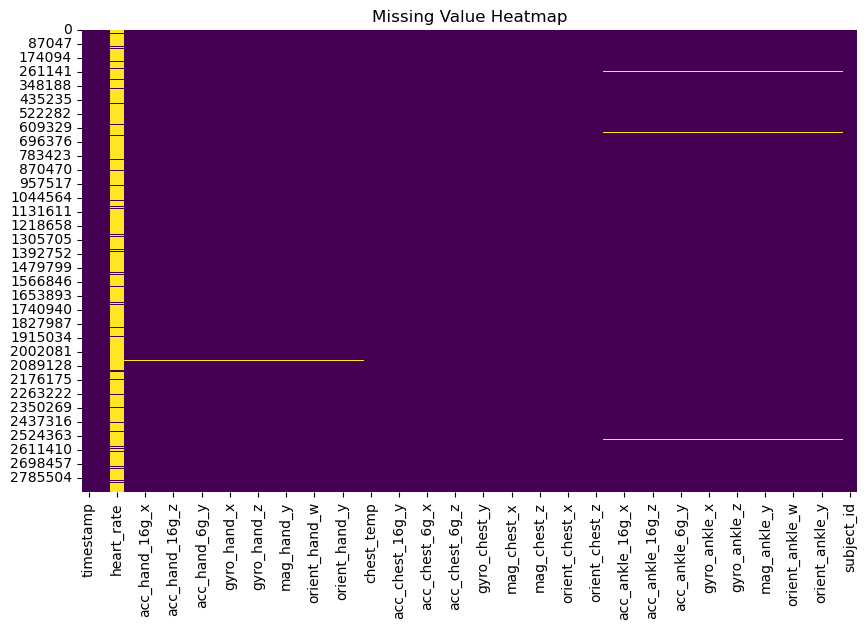

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title("Missing Value Heatmap")
plt.show()

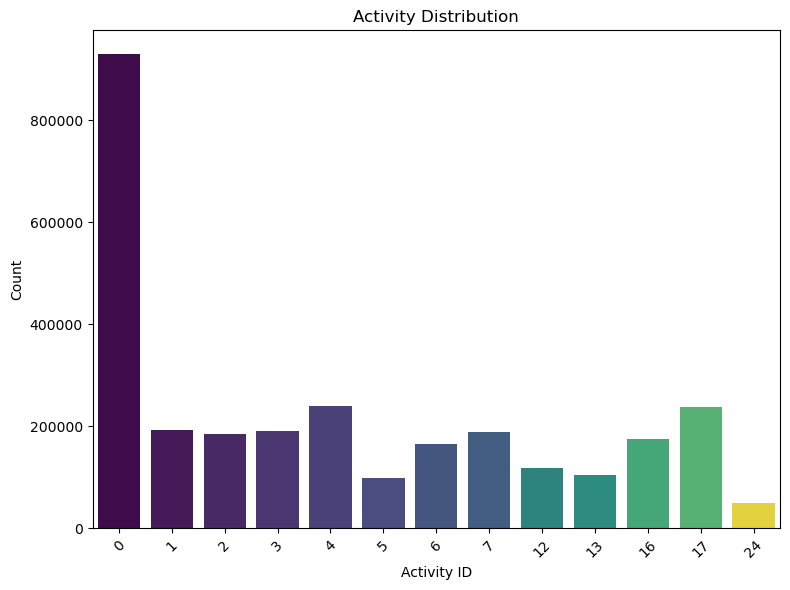

In [40]:
#activity distribution
plt.figure(figsize=(8, 6))
#sns.countplot(x='activity_id', data=df, palette='viridis')
sns.countplot(x='activity_id', hue='activity_id', data=df, palette='viridis', legend=False)
plt.title("Activity Distribution")
plt.xlabel("Activity ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

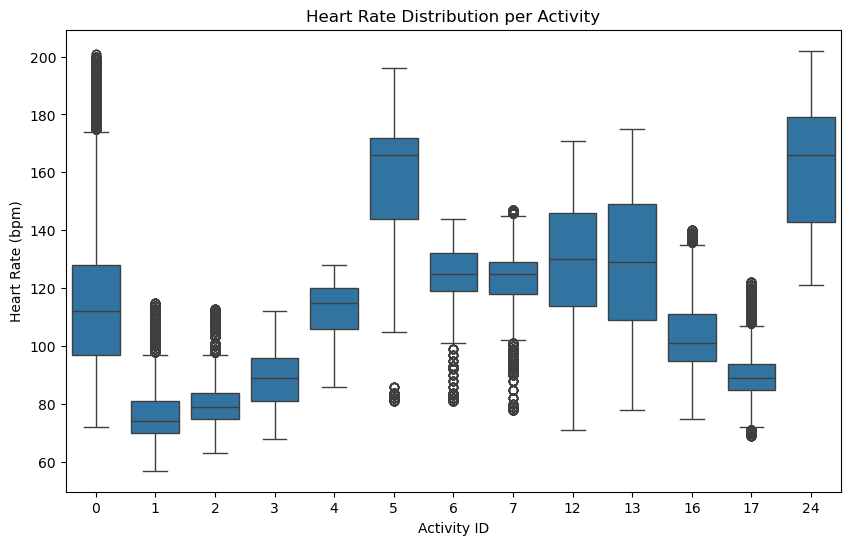

In [42]:
#Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity_id', y='heart_rate', data=df)

plt.title("Heart Rate Distribution per Activity")
plt.xlabel("Activity ID")
plt.ylabel("Heart Rate (bpm)")
plt.show()

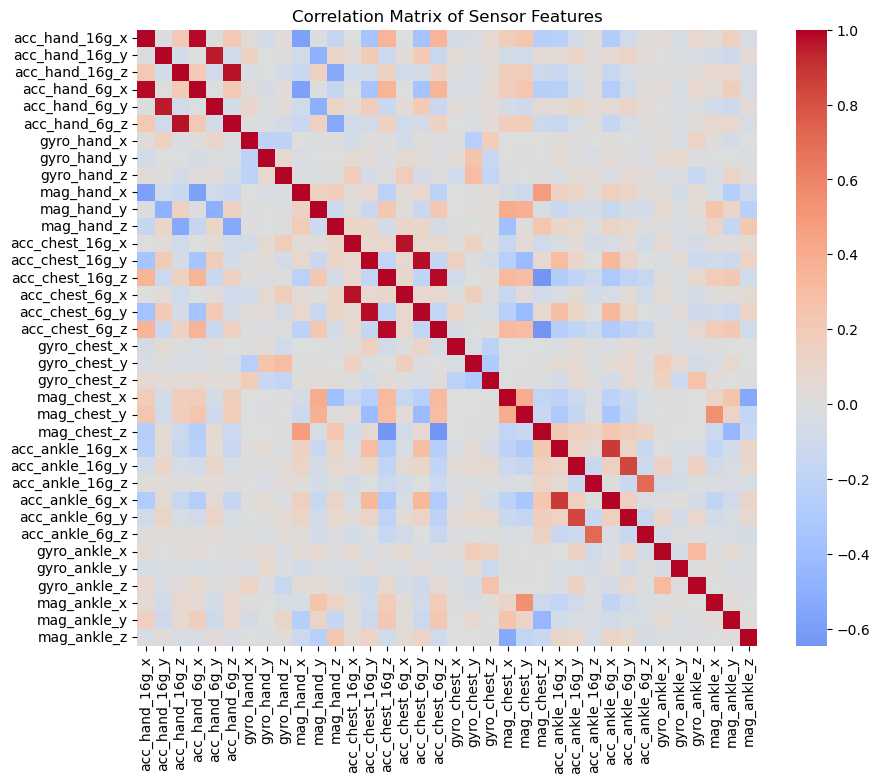

In [44]:
# Sensor Feature Correlation
sensor_features = df.filter(regex='acc_|gyro_|mag_')
plt.figure(figsize=(10, 8))
sns.heatmap(sensor_features.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Sensor Features")
plt.show()

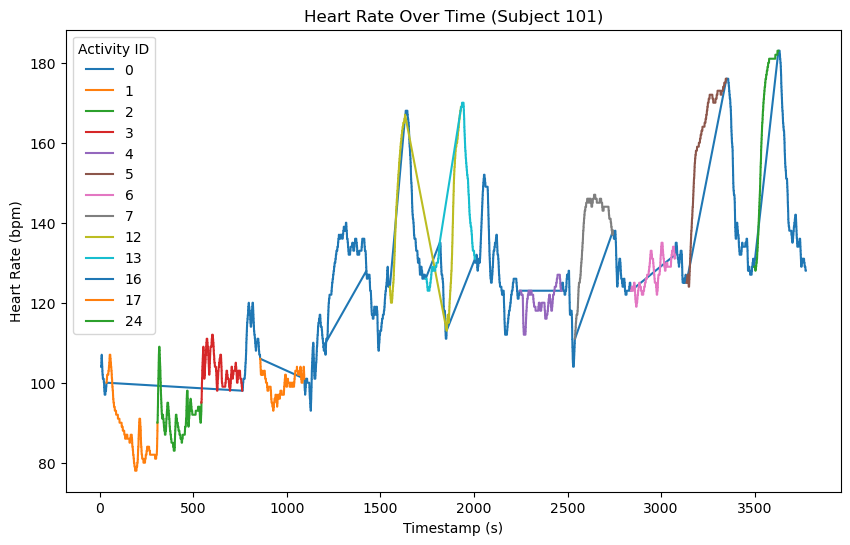

In [46]:
# Heart Rate Time Series for Subject 101
sample_subject = 101
sample_df = df[df['subject_id'] == sample_subject]

plt.figure(figsize=(10, 6))
sns.lineplot(x='timestamp', y='heart_rate', hue='activity_id', data=sample_df, palette='tab10')
plt.title(f"Heart Rate Over Time (Subject {sample_subject})")
plt.xlabel("Timestamp (s)")
plt.ylabel("Heart Rate (bpm)")
plt.legend(title="Activity ID")
plt.show()

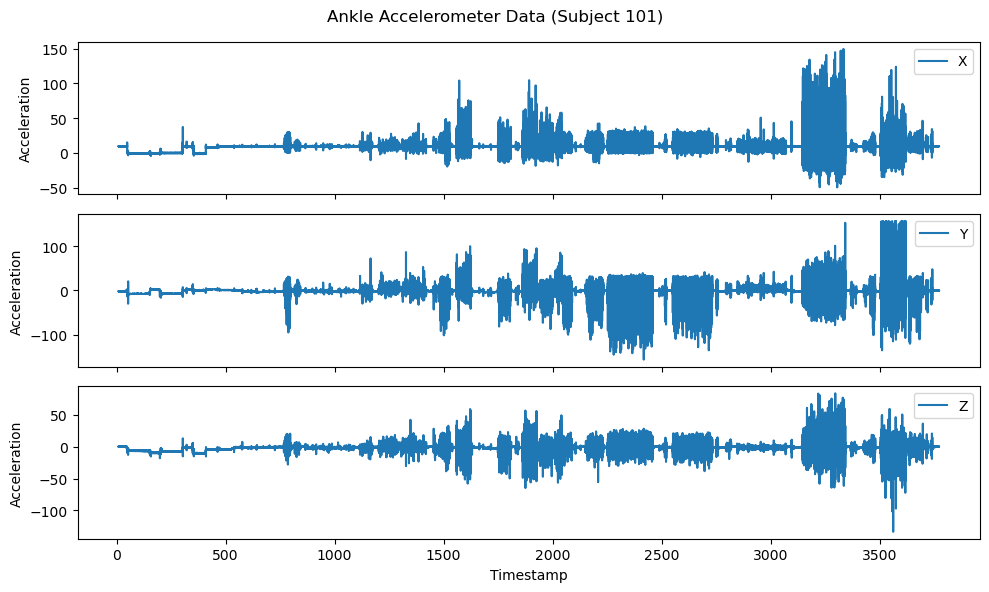

In [48]:
# Accelerometer Sample Visualization
#sample_subject = 101
#sample_df = df[df['subject_id'] == sample_subject]

fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
ax[0].plot(sample_df['timestamp'], sample_df['acc_ankle_16g_x'], label='X')
ax[1].plot(sample_df['timestamp'], sample_df['acc_ankle_16g_y'], label='Y')
ax[2].plot(sample_df['timestamp'], sample_df['acc_ankle_16g_z'], label='Z')

for a in ax:
    a.legend()
    a.set_ylabel("Acceleration")

plt.xlabel("Timestamp")
plt.suptitle("Ankle Accelerometer Data (Subject 101)")
plt.tight_layout()
plt.show()

In [50]:
# Modeling prep: Drop unneeded columns ---
drop_patterns = ['orient_', 'mag_', 'temp', 'acc_hand_16g', 'acc_chest_16g', 'acc_ankle_16g']
columns_to_drop = [col for col in df.columns if any(pattern in col for pattern in drop_patterns)]

# Drop columns in memory
df_reduced=df.drop(columns=columns_to_drop, inplace=True)
#df_reduced.to_csv("modelling_data.csv", index=False)

print(f"Dropped {len(columns_to_drop)} columns. New shape: {df.shape}")
print("Dropped columns:", columns_to_drop)


Dropped 33 columns. New shape: (2872533, 22)
Dropped columns: ['hand_temp', 'acc_hand_16g_x', 'acc_hand_16g_y', 'acc_hand_16g_z', 'mag_hand_x', 'mag_hand_y', 'mag_hand_z', 'orient_hand_w', 'orient_hand_x', 'orient_hand_y', 'orient_hand_z', 'chest_temp', 'acc_chest_16g_x', 'acc_chest_16g_y', 'acc_chest_16g_z', 'mag_chest_x', 'mag_chest_y', 'mag_chest_z', 'orient_chest_w', 'orient_chest_x', 'orient_chest_y', 'orient_chest_z', 'ankle_temp', 'acc_ankle_16g_x', 'acc_ankle_16g_y', 'acc_ankle_16g_z', 'mag_ankle_x', 'mag_ankle_y', 'mag_ankle_z', 'orient_ankle_w', 'orient_ankle_x', 'orient_ankle_y', 'orient_ankle_z']


In [62]:
#train-test split and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df.dropna(subset=['activity_id'], inplace=True)

#def features and target
X = df.drop(columns=['activity_id', 'timestamp', 'subject_id'])
y = df['activity_id']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#pipeline for preprocess
preprocess = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                                ('scaler',StandardScaler())])

#feature scaling
X_train_processed = preprocess.fit_transform(X_train)
X_test_processed = preprocess.transform(X_test)

Random Forest Results:
              precision    recall  f1-score   support

           0       0.55      0.87      0.67    185932
           1       1.00      0.93      0.96     38505
           2       0.97      0.74      0.84     37038
           3       0.85      0.33      0.47     37986
           4       0.66      0.65      0.65     47752
           5       0.98      0.89      0.93     19640
           6       0.85      0.86      0.85     32920
           7       0.82      0.73      0.77     37621
          12       0.86      0.11      0.19     23443
          13       0.83      0.18      0.29     20989
          16       0.72      0.49      0.58     35071
          17       0.78      0.56      0.65     47738
          24       0.95      0.62      0.75      9872

    accuracy                           0.69    574507
   macro avg       0.83      0.61      0.66    574507
weighted avg       0.75      0.69      0.67    574507



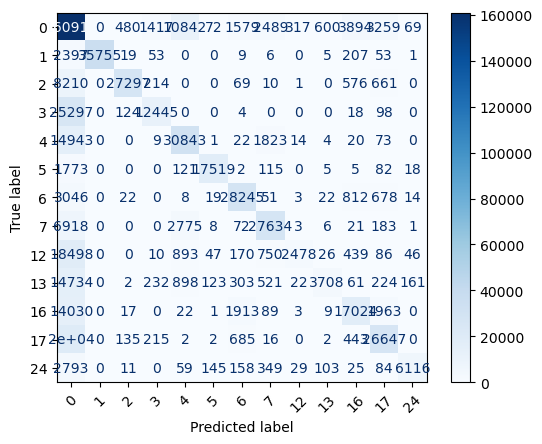

In [66]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_processed, y_train)
y_pred_rf = rf.predict(X_test_processed)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf, X_test_processed, y_test, cmap="Blues", xticks_rotation=45)

SVM Results:
              precision    recall  f1-score   support

           0       0.39      0.94      0.55    185932
           1       0.90      0.91      0.90     38505
           2       0.57      0.03      0.05     37038
           3       0.00      0.00      0.00     37986
           4       0.36      0.11      0.17     47752
           5       0.45      0.01      0.01     19640
           6       0.55      0.81      0.66     32920
           7       0.18      0.01      0.02     37621
          12       0.61      0.03      0.06     23443
          13       0.73      0.04      0.07     20989
          16       0.58      0.19      0.29     35071
          17       0.58      0.12      0.20     47738
          24       0.00      0.00      0.00      9872

    accuracy                           0.45    574507
   macro avg       0.45      0.25      0.23    574507
weighted avg       0.45      0.45      0.33    574507



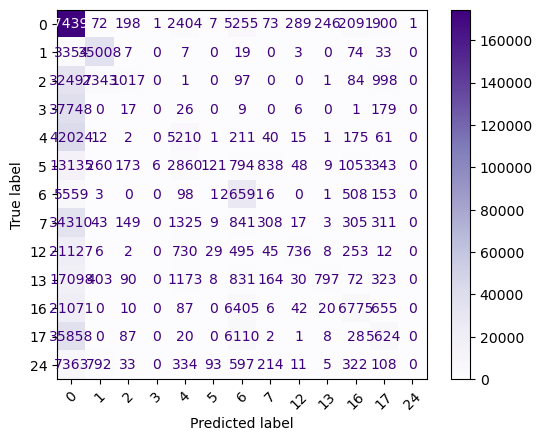

In [68]:
#SVM
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=2000, random_state=42)

svm.fit(X_train_processed, y_train)
y_pred_svm = svm.predict(X_test_processed)

print("SVM Results:")
print(classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_estimator(svm, X_test_processed, y_test, cmap="Purples", xticks_rotation=45)

KNN Results:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95    185932
           1       0.99      0.99      0.99     38505
           2       0.99      0.99      0.99     37038
           3       0.97      0.98      0.98     37986
           4       0.90      0.96      0.93     47752
           5       0.99      0.98      0.99     19640
           6       0.99      0.98      0.98     32920
           7       0.98      0.97      0.98     37621
          12       0.95      0.94      0.94     23443
          13       0.94      0.91      0.92     20989
          16       0.98      0.95      0.97     35071
          17       0.97      0.98      0.97     47738
          24       0.99      0.95      0.97      9872

    accuracy                           0.96    574507
   macro avg       0.97      0.96      0.97    574507
weighted avg       0.96      0.96      0.96    574507



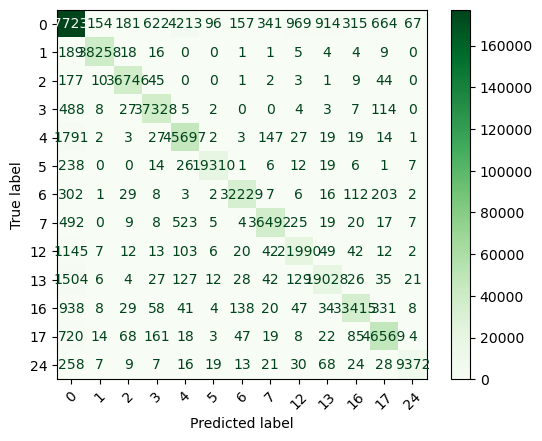

In [70]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_processed, y_train)
y_pred_knn = knn.predict(X_test_processed)

print("KNN Results:")
print(classification_report(y_test, y_pred_knn))

ConfusionMatrixDisplay.from_estimator(knn, X_test_processed, y_test, cmap="Greens", xticks_rotation=45)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:55:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
              precision    recall  f1-score   support

           0       0.62      0.79      0.70    185932
           1       1.00      0.93      0.96     38505
           2       0.95      0.84      0.89     37038
           3       0.81      0.57      0.67     37986
           4       0.64      0.73      0.68     47752
           5       0.96      0.88      0.92     19640
           6       0.85      0.88      0.86     32920
           7       0.80      0.78      0.79     37621
           8       0.70      0.33      0.45     23443
           9       0.71      0.40      0.51     20989
          10       0.75      0.55      0.63     35071
          11       0.73      0.66      0.70     47738
          12       0.94      0.66      0.78      9872

    accuracy                           0.73    574507
   macro avg       0.80      0.69      0.73    574507
weighted avg       0.75      0.73      0.73    574507



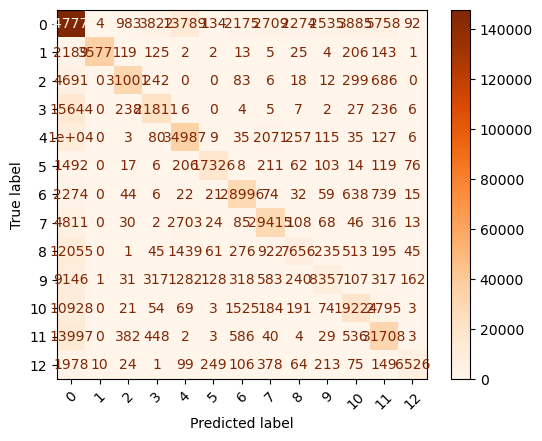

In [80]:


# XGBoost Classifier
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=42)
xgb_model.fit(X_train_processed, y_train)
y_pred_xgb = xgb_model.predict(X_test_processed)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_processed, y_test, cmap="Oranges", xticks_rotation=45)

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Then split using y_encoded
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
# cross validation & GridSearch (on best model RF)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_weighted')
grid_rf.fit(X_train_scaled, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

In [ ]:
# confusion matrix + visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
#error analysis (activity-wise)
report = classification_report(y_test, y_pred_rf, output_dict=True)
activity_errors = {k: v['f1-score'] for k, v in report.items() if k.isdigit()}
sorted_errors = sorted(activity_errors.items(), key=lambda x: x[1])
print("Activities with lowest F1-score:")
print(sorted_errors[:5])